In [1]:
# step 1: Import libraries for data handling, visualization, preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# step 2: Load the dataset
df = pd.read_csv("house_prices.csv")
df.head()


,Size,Number of Rooms,Location,Price
0,1726,5,rural,11.62
1,2059,3,urban,31.59
2,1460,5,urban,31.49
3,1894,4,rural,13.27
4,1730,5,suburban,21.65


In [3]:
# step 3: Check for missing values and basic information
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())


Missing Values:
 Size               0
Number of Rooms    0
Location           0
Price              0
dtype: int64

Data Types:
 Size                 int64
Number of Rooms      int64
Location            object
Price              float64
dtype: object

Descriptive Statistics:
               Size  Number of Rooms       Price
count   200.000000       200.000000  200.000000
mean   1564.920000         2.840000   21.552650
std     549.098543         1.405088    7.975389
min     613.000000         1.000000   10.120000
25%    1099.500000         1.000000   11.885000
50%    1558.500000         3.000000   21.160000
75%    2063.750000         4.000000   30.727500
max    2499.000000         5.000000   32.480000


In [4]:
# step 4: Drop rows with missing values
df = df.dropna()


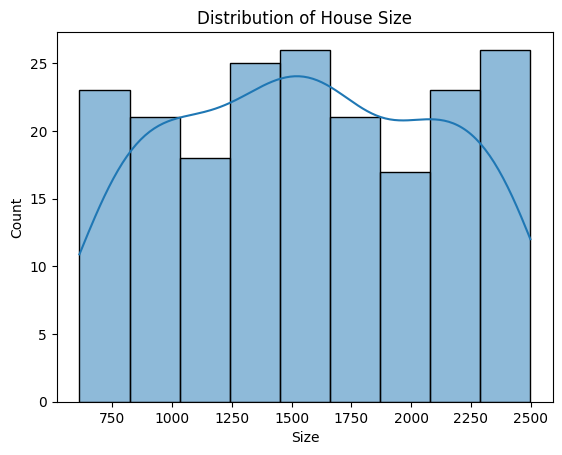

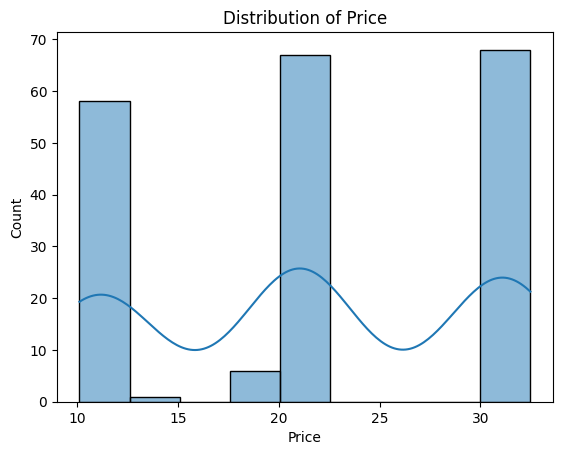

In [5]:
# step 5: Plot Size distribution and price distribution
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of House Size')
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


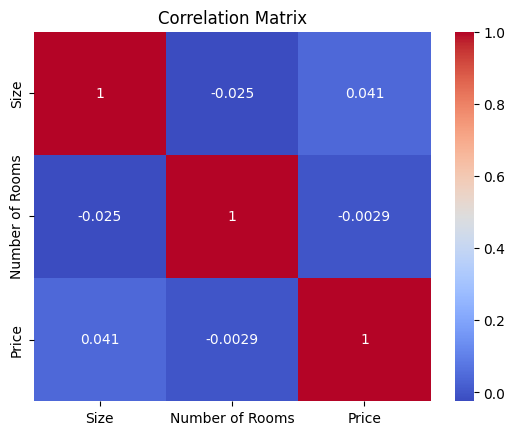

In [6]:
# step 6: Check correlations between numeric variables
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
# step 7: Separate features and target variable
X = df[['Size', 'Number of Rooms', 'Location']]
y = df['Price']


In [8]:
# step 8: Setup for preprocessing
numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])


In [9]:
# step 9: Create pipeline with preprocessing and regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [10]:
# step 10: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
# step 11: Train the model using pipeline
pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
# step 12: Predict on test data
y_pred = pipeline.predict(X_test)


In [13]:
# step 13: Calculate RMSE and R² Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.51
R² Score: 1.00


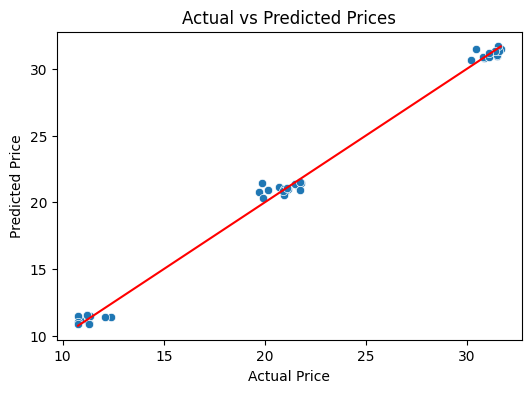

In [14]:
# step 14: Plot predicted vs actual prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [15]:
# step 15: Show importance of each feature (coefficients)
model = pipeline.named_steps['regressor']
feature_names = (
    numeric_features + 
    list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)

coefficients = pd.Series(model.coef_, index=feature_names)
print("Feature Importance:\n", coefficients.sort_values(ascending=False))


Feature Importance:
 Location_urban       19.950854
Location_suburban     9.883601
Size                  0.264814
Number of Rooms       0.188706
dtype: float64
